In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from pathlib import Path
import glob
import h5py
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import time
from datetime import *
from matplotlib.collections import LineCollection
import os, sys
from functions import load_h5_to_dic
from Bootstraping import plot
from Bootstraping import Bootstrap_analysis
from Bootstraping import plot_chunked_averages
from functions import complex_ramsey_fit
from functions import complex_ramsey_gaussian_fit
from Bootstraping import Chunk_Data


In [ ]:
dirpath = 'Z:/SPIN-001/Run2 [BFp4]/RamanManuRamsey9o2_interleaved/'
# dirpath = 'Z:/SPIN-001/Run2 [BFp4]/RamanEchoJaimeTrixV3/'
# dirpath = 'Z:/SPIN-001/Run2 [BFp4]/RamanRamsey9o2_interleaved/'
filename = '20260126173853__RamanManuRamsey9o2_interleaved.hdf5' 
# filename = '20260202121414__RamanEchoJaimeTrixV3.hdf5' 
# filename = '20260119184019__RamanRamsey9o2_interleaved.hdf5'
signal = load_h5_to_dic(dirpath + filename)[0]

In [ ]:
dirpath = 'Z:/SPIN-001/Run2 [BFp4]/RamanEchoJaimeTrixV3/'
filename = '20260203182053__RamanEchoJaimeTrixV3.hdf5' 
signal = load_h5_to_dic(dirpath + filename)[0]

In [2]:
dirpath = 'Z:/SPIN-001/Run2 [BFp4]/RamanManuRamsey9o2_interleaved_Exited_Ground_V2/'
filename = '20251226120051_RamanManuRamsey9o2_interleaved_Exited_Ground_V2.hdf5' 
signal = load_h5_to_dic(dirpath + filename)[0]

In [ ]:
dirpath = 'Z:/SPIN-001/Run2 [BFp4]/RamanEchoJaimeTrixV3/'
filename = '20260203182053__RamanEchoJaimeTrixV3.hdf5' 
signal = load_h5_to_dic(dirpath + filename)[0]
chunked_signals = Chunk_Data(signal,135)

print(signal.keys())
print( signal['time']*1e3)

transition = 0
data_clicks = signal['data_click']
NRO = signal['N_RO']
nuclear_detuning = 0
artificial_detuning = 0
threshold = signal['threshold']
meas_time = signal['meas_time_hours']
time_ = signal['time']*1e3 #(np.linspace(10000,3010000,21)*1e-6)
plot_chunked_averages(threshold=threshold,transition=transition,data_click=data_clicks,time_=time_,meas_time=meas_time,n = 136,decay_time = 3*1e3)
plot(data_clicks,NRO,transition = transition ,time_ = time_,nuclear_detuning = nuclear_detuning,artificial_detuning = artificial_detuning,threshold=threshold,drive_freq=0,meas_time=meas_time,decay_time=3*1e3,plot_bootstrap=True)
print('the chunking begins')
for signal_chunked in chunked_signals:
    transition = 0
    data_clicks = signal_chunked['data_click']
    NRO = signal_chunked['N_RO']
    nuclear_detuning = 0
    artificial_detuning = 0
    threshold = signal_chunked['threshold']
    meas_time = signal_chunked['meas_time_hours']
    time_ = signal_chunked['time']*1e3 #(np.linspace(10000,3010000,21)*1e-6)
    plot(data_clicks,NRO,transition = transition ,time_ = time_,nuclear_detuning = nuclear_detuning,artificial_detuning = artificial_detuning,threshold=threshold,drive_freq=0,meas_time=meas_time,decay_time=3*1e3,plot_bootstrap=True)


In [ ]:
for transition in range(9):
    data_clicks = signal['data_click'][:, transition, :, :, :]
    NRO = signal['N_RO']
    nuclear_detuning = signal['nuclear_detuning'][transition]
    artificial_detuning = signal['artificial_detuning'][transition]
    threshold = signal['threshold']
    meas_time = signal['meas_time']
    time_ = (np.linspace(10000,3_010_000,41)*1e-6)
    plot(data_clicks,NRO,transition = transition ,time_ = time_,nuclear_detuning = nuclear_detuning,artificial_detuning = artificial_detuning,threshold=threshold,drive_freq=0,meas_time=meas_time,decay_time=1,plot_bootstrap=True)
    plot_chunked_averages(threshold=threshold,transition=transition,data_click=data_clicks,time_=time_,meas_time=meas_time,n = 70,decay_time = 1,fit_func=co)

dict_keys(['iteration', 'data_click', 'meas_time_hours', 'threshold', 'N_RO', 'artificial_detuning', 'artificial_detuning_g', 'nuclear_detuning', 'nuclear_detuning_g', 'end_transition', 'meas_time', 'ramsey_time', 'ramsey_time_g'])
Transition 0: Fitted Frequency = -1020.38 Hz,, Std = 5.7657 Hz


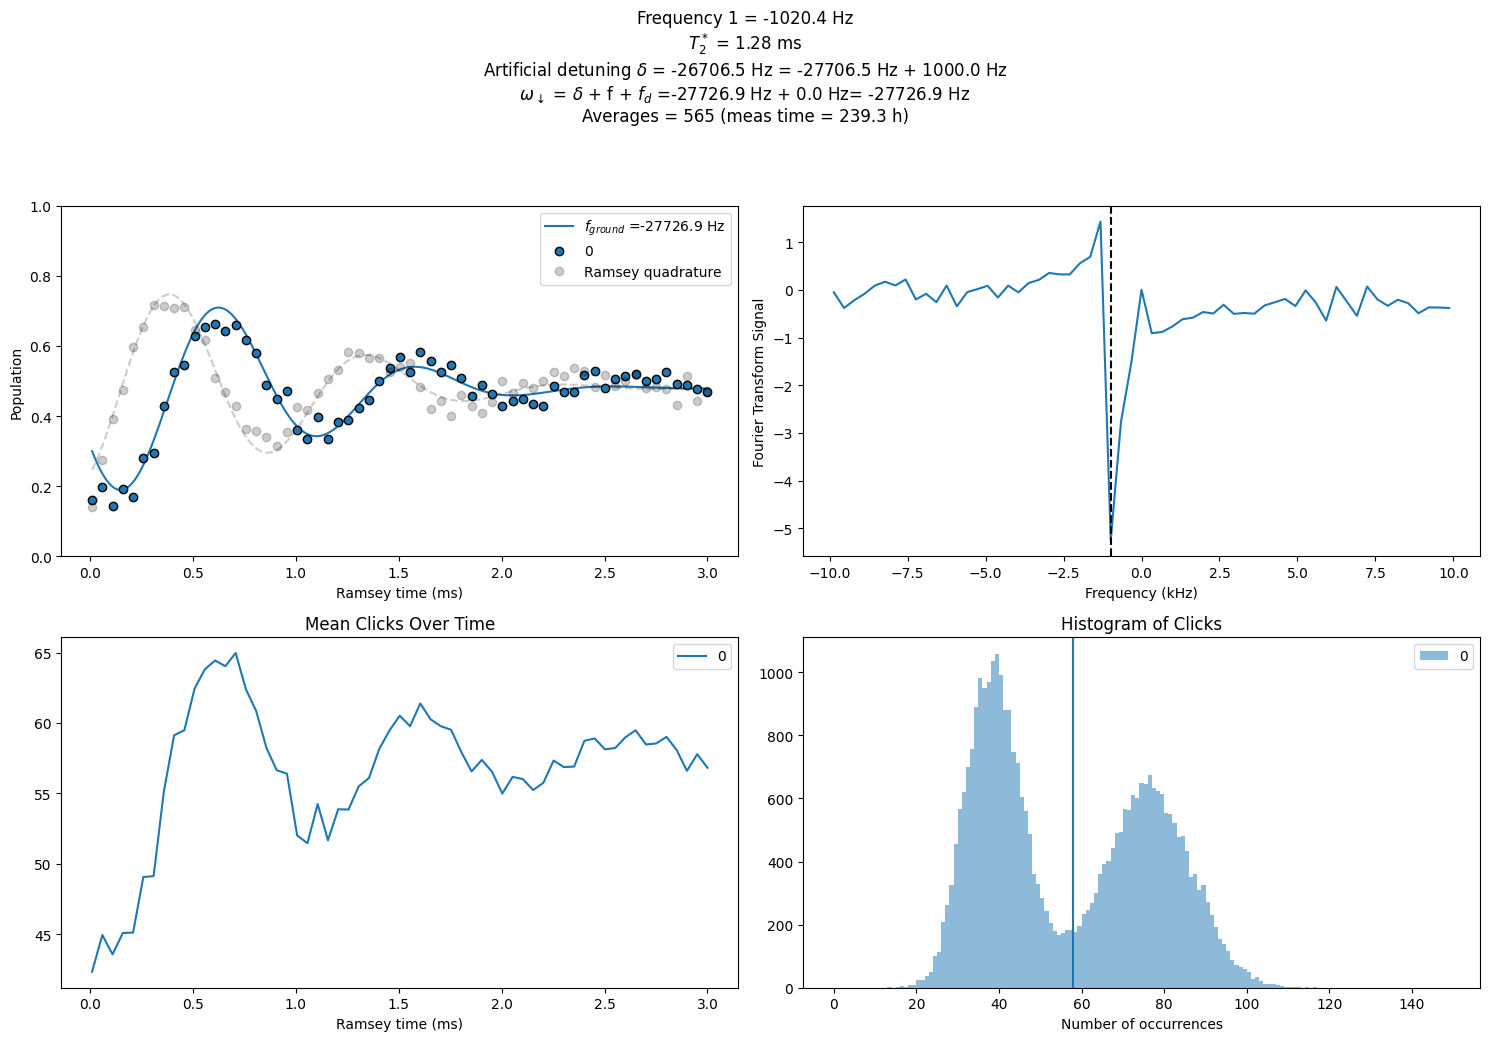

Transition 1: Fitted Frequency = -1031.44 Hz,, Std = 5.5012 Hz


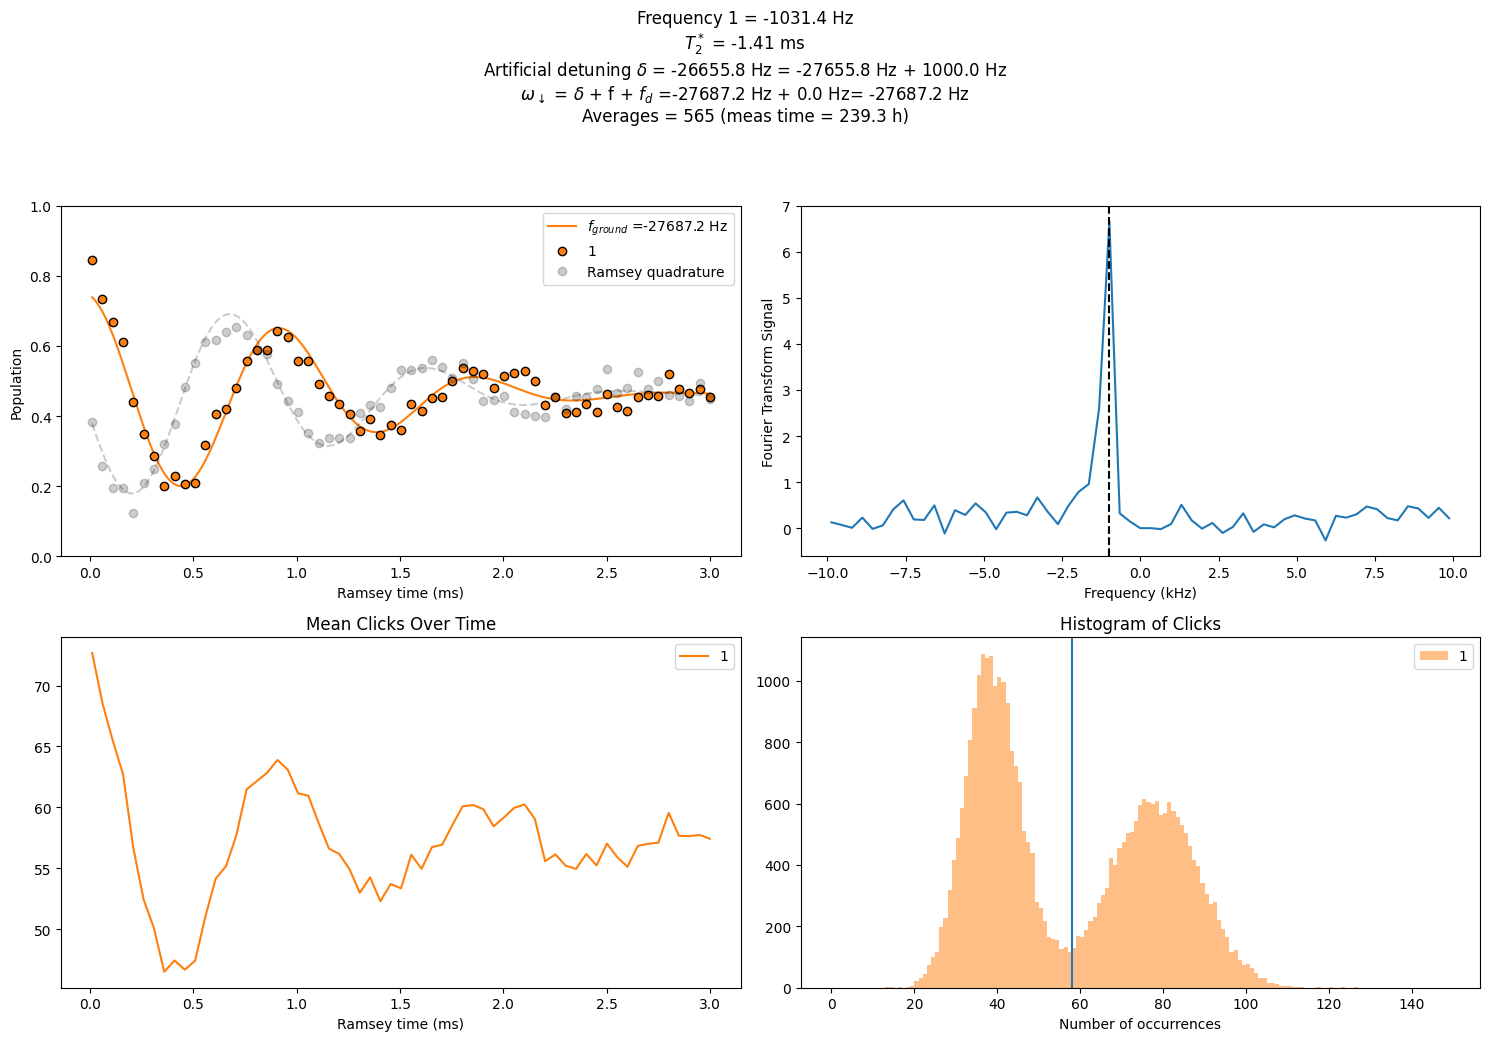

Transition 2: Fitted Frequency = -1044.35 Hz,, Std = 5.8450 Hz


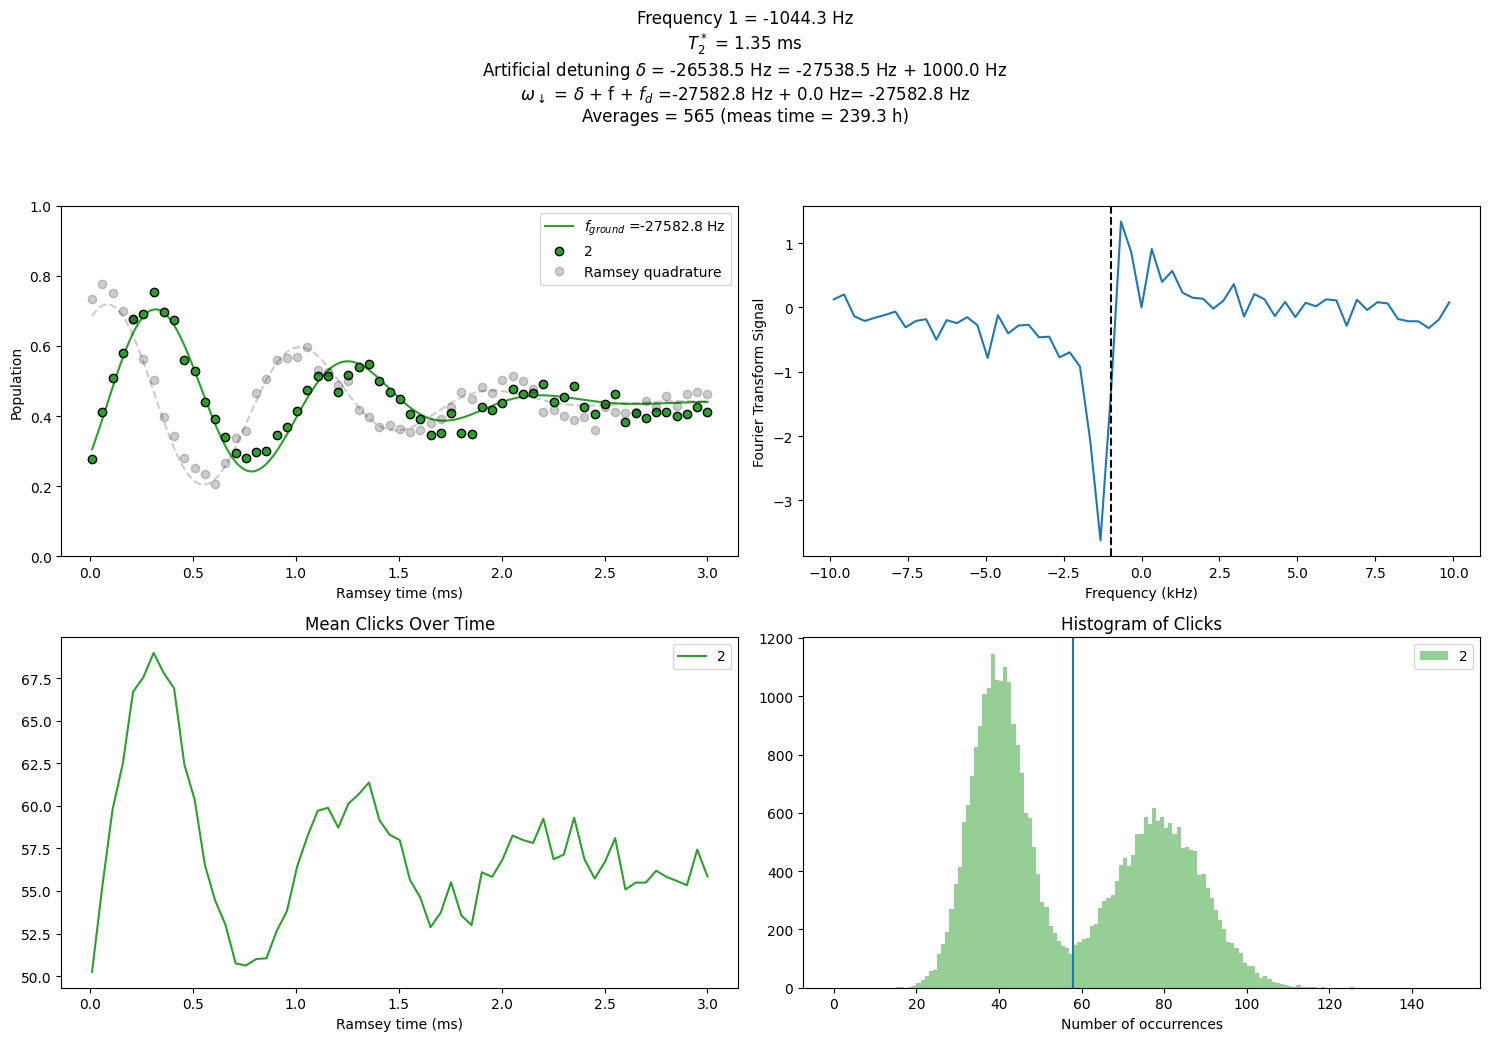

Transition 3: Fitted Frequency = -966.50 Hz,, Std = 5.3050 Hz


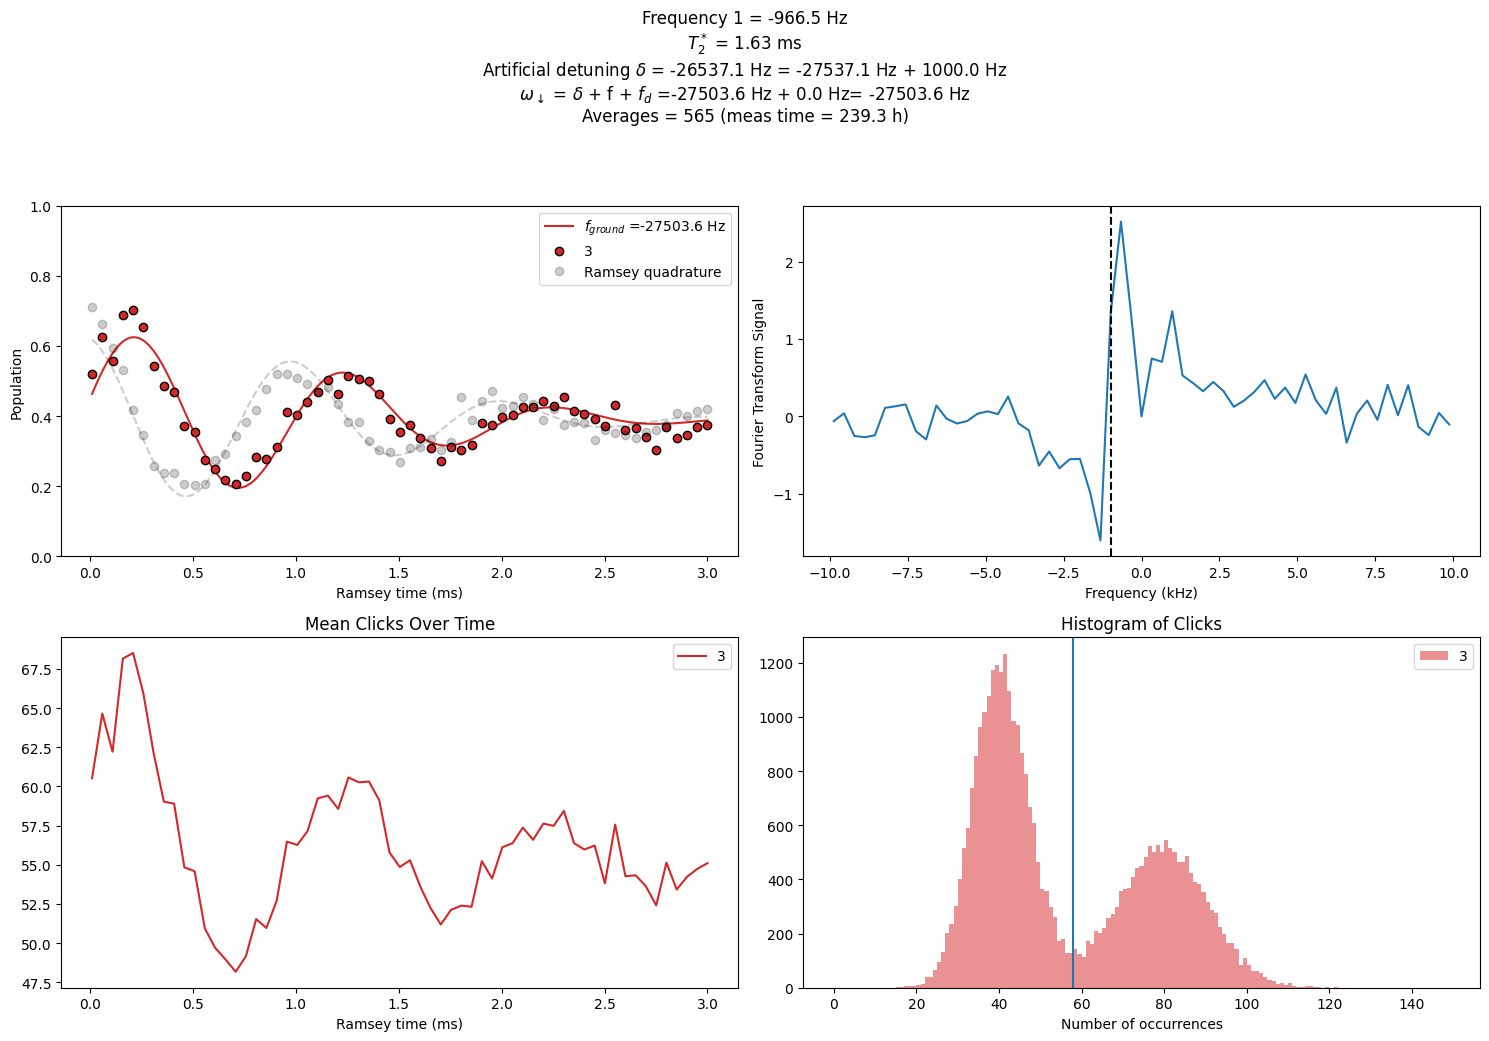

Transition 4: Fitted Frequency = -1085.84 Hz,, Std = 6.7760 Hz


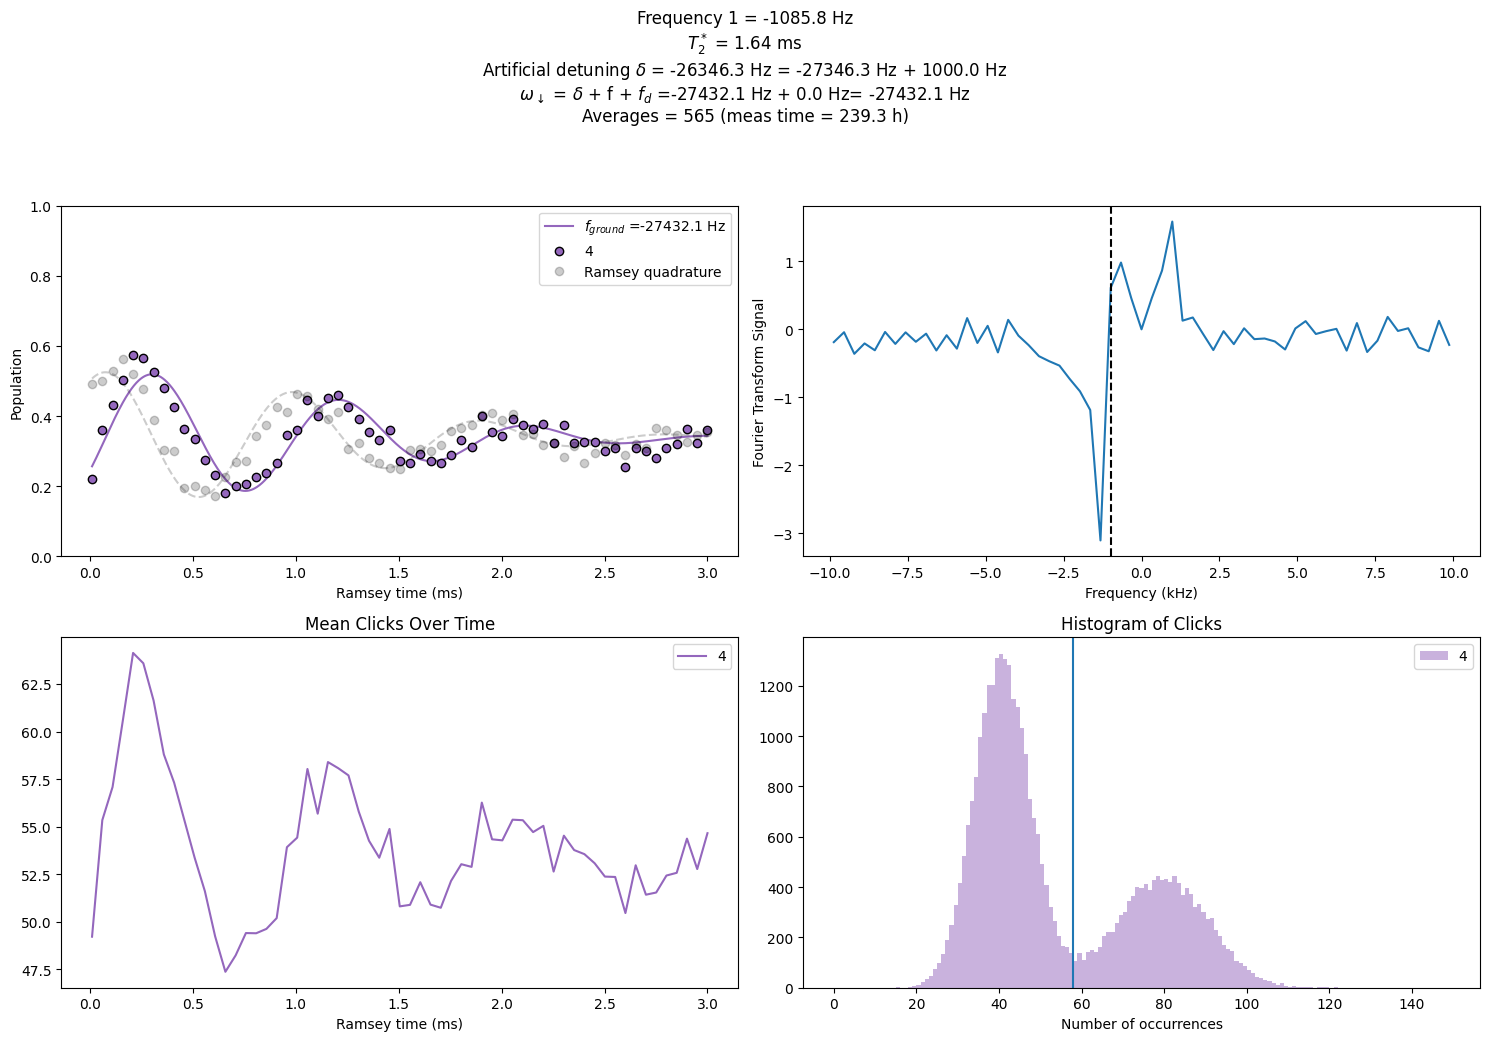

Transition 5: Fitted Frequency = -1004.26 Hz,, Std = 8.1508 Hz


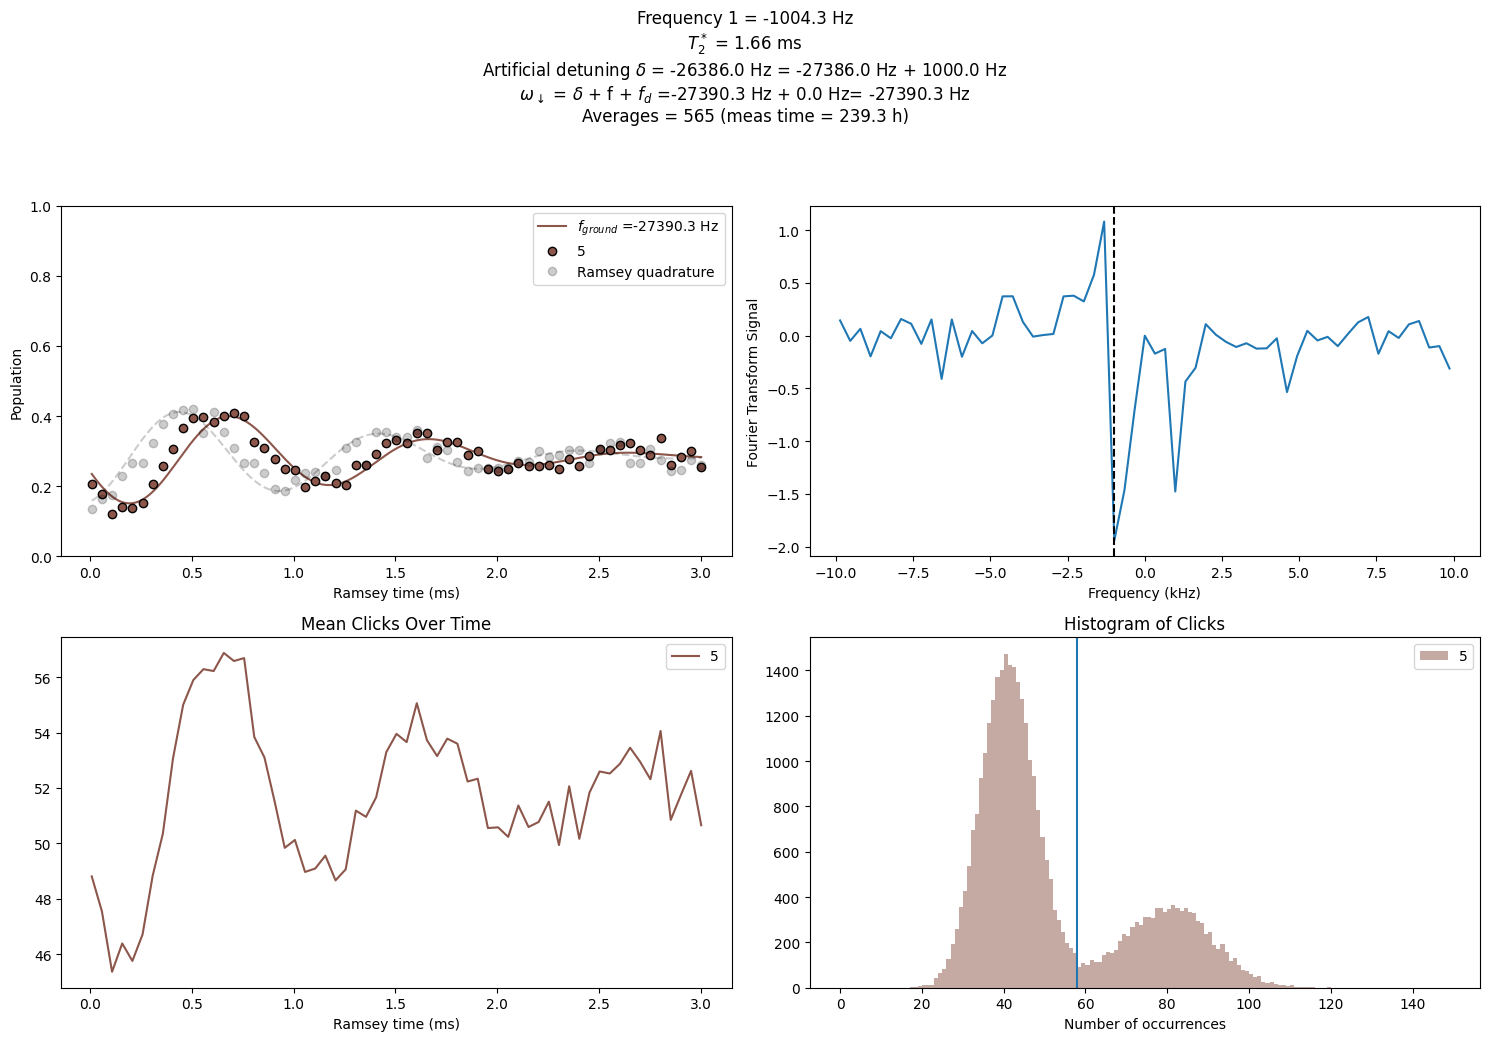

Transition 6: Fitted Frequency = -1010.17 Hz,, Std = 13.7237 Hz


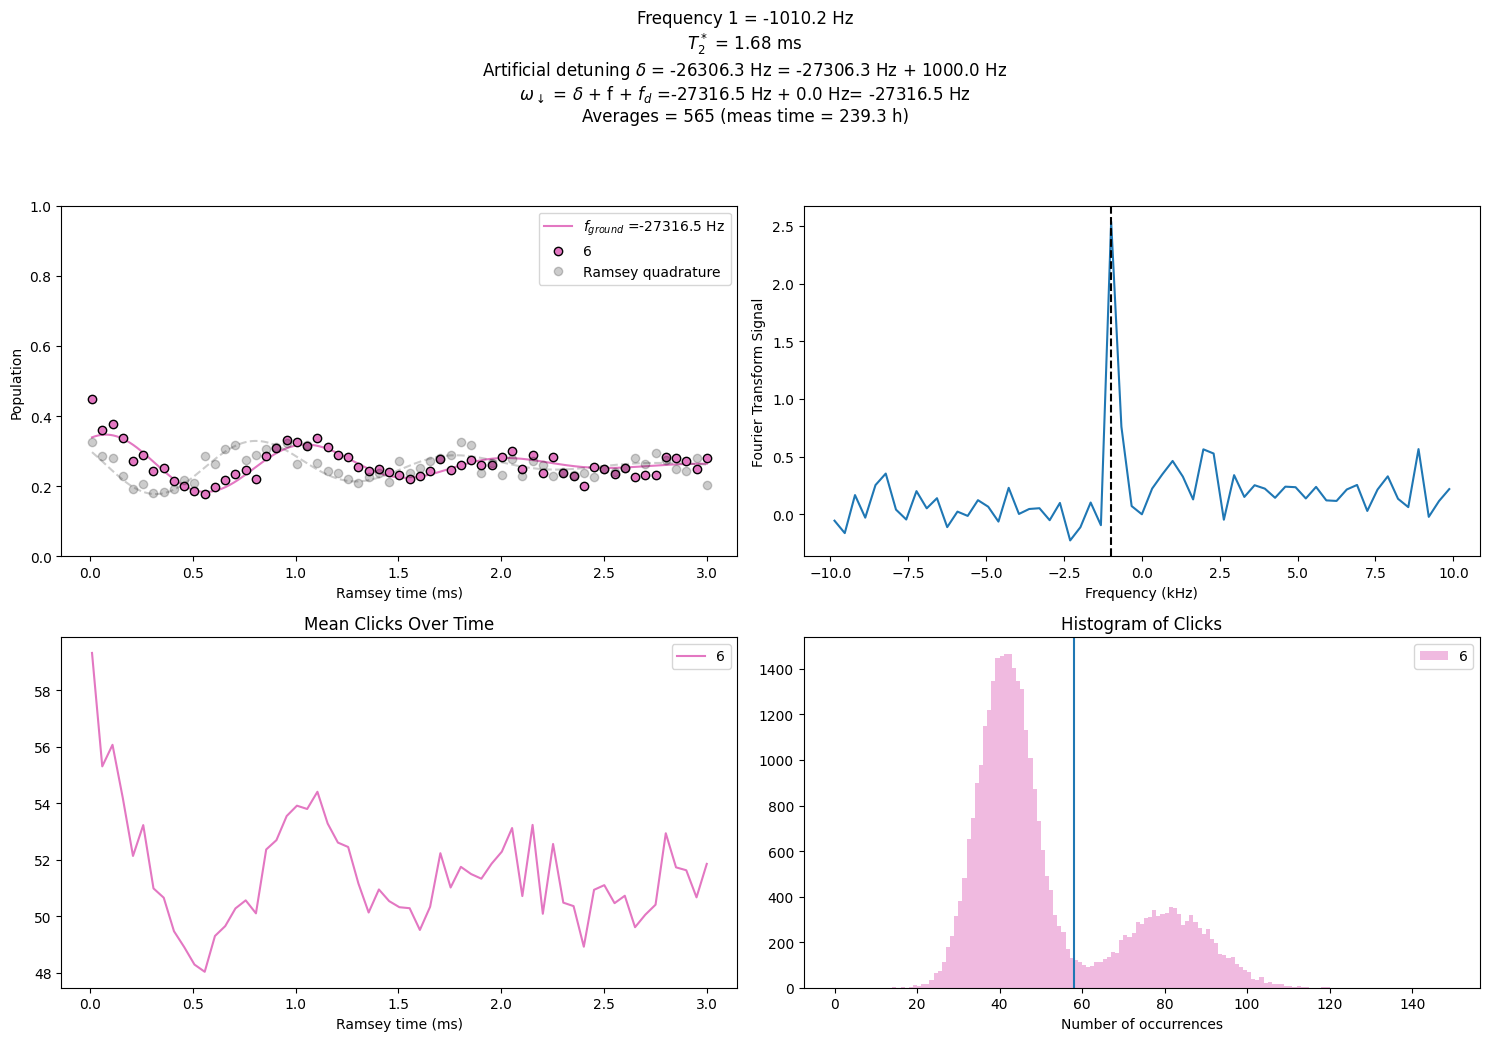

In [4]:
# dirpath = 'Z:/SPIN-001/Run2 [BFp4]/RamanRamsey9o2_interleaved/'
# filename = '20260119184019__RamanRamsey9o2_interleaved.hdf5'
# signal = load_h5_to_dic(dirpath + filename)[0]
print(signal.keys())
data_clicks_ = signal['data_click'][:,1, :, :, :, :]
# print(signal['ramsey_time_g']/1e6)
# print(data_clicks.shape)
for transition in range(0,7):
    data_clicks = data_clicks_[:, transition, :, :, :]
    NRO = signal['N_RO']
    nuclear_detuning = signal['nuclear_detuning'][transition]
    artificial_detuning = signal['artificial_detuning'][transition]
    threshold = 58
    meas_time = signal['meas_time']
    time_ = signal['ramsey_time']/1e6
    plot(data_clicks,NRO,transition = transition ,time_ = time_,nuclear_detuning = nuclear_detuning,artificial_detuning = artificial_detuning,threshold=threshold,drive_freq=0,meas_time=meas_time,decay_time=3,plot_bootstrap=False,plot_guess=False,fit_func=complex_ramsey_gaussian_fit)
    # plot_chunked_averages(threshold=threshold,transition=transition,data_click=data_clicks,time_=time_,meas_time=meas_time,n = 34,decay_time = 1000)

In [ ]:
T2 = [2.31,3.05,3.15,3.52,2.21,3.45,1.81,0.71]
plt.plot(T2)